In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df = pd.read_csv("dataset/vgames2.csv", index_col = 0)

In [3]:
df.shape

(16598, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [5]:
# 결측치 확인 및 처리
df.isnull().sum()

# 결측치 확인 결과 연도, 장르 , 발행자 대한 정보에 결측값 존재
# 연도하고 장르는 프로젝트에 중요한 역할을 함으로 행 전제 삭제
# 발행자는 중요하지 않기 때문에 non으로 대체
df_null = df[df.Year.isnull() | df.Genre.isnull()]
df = df.drop(df_null.index).reset_index(drop = True)
df['Publisher'] = df['Publisher'].fillna('Non')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  object 
 6   EU_Sales     16277 non-null  object 
 7   JP_Sales     16277 non-null  object 
 8   Other_Sales  16277 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
#컬럼별 데이터 확인
list(df['Name'].unique())

["Candace Kane's Candy Factory",
 'The Munchables',
 'Otome wa Oanesama Boku ni Koi Shiteru Portable',
 'Deal or No Deal: Special Edition',
 'Ben 10 Ultimate Alien: Cosmic Destruction',
 'Power Pro Kun Pocket 8',
 "JASF: Jane's Advanced Strike Fighters",
 'Samurai Warriors: State of War',
 'Imabikisou',
 'The Penguins of Madagascar: Dr. Blowhole Returns - Again!',
 'Ford Racing',
 'Harvest Moon: More Friends of Mineral Town',
 'Mount & Blade',
 "The Professor's Brain Trainer: Logic",
 'Zoids Dash',
 'Mini Ninjas',
 'Rise of Nations',
 'Hajime no Ippo: The Fighting! (2014)',
 'Grand Kingdom',
 'Tropico Reloaded',
 'Ty the Tasmanian Tiger',
 'Ghost in the Shell',
 "Cabela's Dangerous Hunts 2",
 'Don Bradman Cricket 14',
 'Injustice: Gods Among Us',
 'Dr. Muto',
 'Starwinder: The Ultimate Space Race',
 'World of Tanks',
 'Famicom Mini: Makaimura',
 'McGrath Vs. Pastrana Freestyle Motocross',
 'Kids Learn Music A+ Edition',
 'Project Sylpheed: Arc of Deception',
 'Mario & Luigi: Paper Jam 

In [7]:
list(df['Platform'].unique())

['DS',
 'Wii',
 'PSP',
 'PS3',
 'PC',
 'PS',
 'GBA',
 'PS4',
 'PS2',
 'XB',
 'X360',
 'GC',
 '3DS',
 '2600',
 'SAT',
 'GB',
 'NES',
 'DC',
 'N64',
 'XOne',
 'SNES',
 'WiiU',
 'PSV',
 'GEN',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

In [8]:
list(df['Year'].unique())
# 문제가 있음

[2008.0,
 2009.0,
 2010.0,
 2005.0,
 2011.0,
 2007.0,
 2001.0,
 2003.0,
 2006.0,
 2014.0,
 2015.0,
 2002.0,
 1997.0,
 2013.0,
 1996.0,
 2004.0,
 2000.0,
 1984.0,
 1998.0,
 2016.0,
 1985.0,
 1999.0,
 9.0,
 97.0,
 1995.0,
 1993.0,
 2012.0,
 1987.0,
 1982.0,
 11.0,
 1994.0,
 1990.0,
 15.0,
 1992.0,
 1991.0,
 1983.0,
 1988.0,
 1981.0,
 3.0,
 1989.0,
 96.0,
 6.0,
 8.0,
 1986.0,
 1.0,
 5.0,
 4.0,
 10.0,
 98.0,
 7.0,
 16.0,
 86.0,
 14.0,
 95.0,
 2017.0,
 1980.0,
 2020.0,
 2.0,
 13.0,
 0.0,
 12.0,
 94.0]

In [9]:
list(df['Genre'].unique())

['Action',
 'Adventure',
 'Misc',
 'Platform',
 'Sports',
 'Simulation',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Strategy',
 'Fighting',
 'Shooter']

In [10]:
list(df['Publisher'].unique())

['Destineer',
 'Namco Bandai Games',
 'Alchemist',
 'Zoo Games',
 'D3Publisher',
 'Konami Digital Entertainment',
 'Deep Silver',
 'Tecmo Koei',
 'Sega',
 'THQ',
 'Empire Interactive',
 'Ubisoft',
 'Paradox Interactive',
 '505 Games',
 'Tomy Corporation',
 'Eidos Interactive',
 'Microsoft Game Studios',
 'Nippon Ichi Software',
 'Kalypso Media',
 'Electronic Arts',
 'Sony Computer Entertainment',
 'Activision',
 'Tru Blu Entertainment',
 'Warner Bros. Interactive Entertainment',
 'Midway Games',
 'Mindscape',
 'Wargaming.net',
 'Capcom',
 'Acclaim Entertainment',
 'Unknown',
 'Nintendo',
 'Disney Interactive Studios',
 'Crave Entertainment',
 'Sunflowers',
 'Arc System Works',
 'Milestone S.r.l',
 'Kamui',
 'Hudson Soft',
 'Square Enix',
 'Focus Home Interactive',
 'Take-Two Interactive',
 'Game Factory',
 'Takara Tomy',
 'SquareSoft',
 'Global Star',
 'Infogrames',
 'GT Interactive',
 'Storm City Games',
 'Gathering of Developers',
 'Giza10',
 'Imagineer',
 'Atari',
 'SouthPeak Games'

In [11]:
list(df['NA_Sales'].unique())

['0.04',
 '0.17',
 '0',
 '0.12',
 '0.02',
 '0.07',
 '480K',
 '0.14',
 '0.01',
 '0.57',
 '0.06',
 '0.08',
 '0.48',
 '0.03',
 '0.05',
 '0.29',
 '0.19',
 '0.3',
 '0.26',
 '0.11',
 '0.18',
 '0.33',
 '0.51',
 '60K',
 '0.13',
 '0.34',
 '0.25',
 '0.41',
 '0.52',
 '0.22',
 '0.35',
 '0.1',
 '0.67',
 '0.59',
 '0.36',
 '0.21',
 '1.19',
 '5.91',
 '1.98',
 '0.09',
 '0K',
 '0.5',
 '0.94',
 '0.16',
 '0.63',
 '0.43',
 '0.2',
 '1.23',
 '0.44',
 '0.42',
 '0.97',
 '2.67',
 '0.28',
 '6.05',
 '0.47',
 '0.49',
 '0.62',
 '0.24',
 '0.72',
 '1.74',
 '0.46',
 '0.65',
 '0.32',
 '1.53',
 '0.23',
 '0.53',
 '0.37',
 '1.26',
 '0.39',
 '0.58',
 '1.94',
 '2.31',
 '1.03',
 '0.82',
 '0.4',
 '0.93',
 '0.56',
 '0.96',
 '1.64',
 '0.69',
 '1.25',
 '0.27',
 '0.92',
 '0.58M',
 '1.24',
 '0.25M',
 '0.86',
 '0.73',
 '0.55',
 '1.54',
 '1.02',
 '1.27',
 '0.54',
 '0.15',
 '1.09',
 '3.44',
 '2.29',
 '0.88',
 '5.55M',
 '1.37',
 '2.3',
 '0.99',
 '1.15',
 '0.98',
 '0.75',
 '0.74',
 '0.7',
 '0.14M',
 '0.45',
 '1.2',
 '1.41',
 '0.68',
 '

In [12]:
list(df['EU_Sales'].unique())

['0',
 '0.09',
 '0.01',
 '0.03',
 '0.33M',
 '0.05',
 '0.02',
 '0.16',
 '0.45',
 '0.04',
 '0.53',
 '0.23',
 '0.1',
 '0.22',
 '0.2',
 '0.03M',
 '0.33',
 '0.08',
 '0.26',
 '0.07',
 '0.11',
 '0.17',
 '0.06',
 '0.14',
 '0.12',
 '0.24',
 '0.13',
 '0.21',
 '0.15',
 '0.3',
 '2.38',
 '0.55',
 '0K',
 '1.12',
 '0.43',
 '50K',
 '0.63',
 '0.35',
 '1.11',
 '0.41',
 '0.01M',
 '0.89',
 '3.15',
 '0.18',
 '0.54',
 '0.25',
 '0.29',
 '0.34',
 '0.61',
 '0.27',
 '0.86',
 '0.87',
 '0.32',
 '0.44',
 '2.48',
 '0.48',
 '0.47',
 '0.66',
 '0.76',
 '0.27M',
 '0.15M',
 '1.94',
 '0.97',
 '0.72',
 '620K',
 '0.49',
 '5.36',
 '0.31',
 '0.62',
 '0.4',
 '0.57',
 '0.46',
 '1.97',
 '1.02',
 '1.75',
 '0.28',
 '2.46',
 '0.38',
 '0.5',
 '0.9',
 '0.19',
 '0.39',
 '0.67',
 '0.64',
 '0.37',
 '0.51',
 '2.83',
 '0.59',
 '0.75',
 '0.52',
 '1.34',
 '760K',
 '80K',
 '5.09',
 '1.09',
 '2.19',
 '2.17',
 '0.91',
 '2.26',
 '0.83',
 '0.74',
 '0.88',
 '0.77',
 '1.24',
 '0.92',
 '0.8',
 '0.36',
 '20K',
 '1.15',
 '0.58',
 '1.51',
 '0M',
 '40

In [13]:
list(df['JP_Sales'].unique())

['0',
 '0.02',
 '0.14',
 '0.11',
 '0.04',
 '0K',
 '0.03',
 '0.01',
 '0.08',
 '0.3',
 '0.25',
 '0.05',
 '0.16',
 '0.12',
 '0.07',
 '0.85',
 '0.37',
 '0.41',
 '0.51',
 '0.89',
 '1.17',
 '0.13',
 '0.17',
 '0.6',
 '0.06',
 '0.53',
 '1.25',
 '0.18',
 '0.15',
 '4.1',
 '0.22',
 '0.46',
 '0.34',
 '1.2',
 '0.31',
 '0.65',
 '0.21',
 '1.96',
 '0.09',
 '0.28',
 '0.64',
 '0.57',
 '0.36',
 '0.19',
 '0.26',
 '0.75',
 '0.44',
 '0.27',
 '0.5',
 '0.62',
 '0.87',
 '0.2',
 '0.23',
 '2.35',
 '0.69',
 '0.97',
 '0.01M',
 '0.49',
 '5.32',
 '0.4',
 '2.62',
 '1.08',
 '0.56',
 '0.1',
 '2.23',
 '1.07',
 '0.47',
 '0M',
 '0.29',
 '0.76',
 '0.72',
 '0.33',
 '0.91',
 '0.74',
 '0.24',
 '0.55',
 '0.48',
 '0.32',
 '30K',
 '0.7',
 '0.75M',
 '0.9',
 '0.86',
 '1.18',
 '0.45M',
 '0.63',
 '0.35',
 '1.87',
 '1.31',
 '0.38',
 '1.75',
 '0.06M',
 '1.06',
 '1.13',
 '4.22',
 '1.1',
 '0.88',
 '0.59',
 '0.83',
 '1.12',
 '1.33',
 '1.26',
 '1.35',
 '40K',
 '0.99',
 '1.29',
 '50K',
 '0.02M',
 '0.79',
 '0.45',
 '3.15M',
 '1.39',
 '0.39'

In [14]:
list(df['Other_Sales'].unique())

['0',
 '0.01',
 '0.04',
 '0.06',
 '0.15',
 '0.23',
 '0.02',
 '0.08',
 '0.05',
 '0.03',
 '0.1',
 '0M',
 '0.01M',
 '0.2',
 '0.9',
 '0.32',
 '0.07',
 '0.34',
 '0.22',
 '0.37',
 '0.14',
 '1.07',
 '10K',
 '0.25',
 '0K',
 '0.24',
 '0.16',
 '0.09',
 '0.21',
 '0.58',
 '30K',
 '0.13',
 '0.18',
 '0.12',
 '0.27',
 '0.77',
 '0.39',
 '0.44',
 '0.26',
 '1.18',
 '0.11',
 '0.72',
 '0.28',
 '0.19',
 '1.09',
 '0.54',
 '0.06M',
 '1.75',
 '2.46',
 '0.31',
 '0.17',
 '0.33',
 '1.16',
 '0.7',
 '50K',
 '0.42',
 '0.29',
 '0.41',
 '0.61',
 '1.14',
 '0.64',
 '0.43',
 '0.3',
 '0.35',
 '0.66',
 '0.05M',
 '0.4',
 '2.02',
 '0.79',
 '0.69',
 '0.73',
 '0.18M',
 '0.99',
 '40K',
 '80K',
 '0.36',
 '1.26',
 '0.52',
 '1.73',
 '0.03M',
 '0.47',
 '1.68',
 '0.48',
 '1.32',
 '0.59',
 '8.46',
 '2.85',
 '1.23',
 '0.75',
 '1.47',
 '0.49',
 '0.88',
 '0.57',
 '2.96',
 '2.15',
 '4.14',
 '0.53',
 '0.04M',
 '0.38',
 '0.02M',
 '0.46',
 '0.65',
 '0.51',
 '1.04',
 '2.52',
 '0.78',
 '1.67',
 '0.2M',
 '1.48',
 '0.87',
 '1.41',
 '20K',
 '0.

In [15]:
#연도 데이터 수정하기
df['Year'] = df['Year'].astype('int')
def year(y):
    if  (y>=0) & (y<22):
        y = y+2000
    elif (y>=22) & (y<1000):
        y = y+1900
    else:
        y = y
    return y

df['Year'] = df['Year'].apply(year)

In [16]:
sorted(df['Year'].unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020]

In [17]:
# Sales 데이터 수정하기
def scale(s):
    if s.endswith('M'):
        s = s.replace('M', '')
    elif s.endswith('K'):
        s = s.replace('K','')
        s = float(s)*0.001
    return s 

df['NA_Sales'] = df['NA_Sales'].apply(scale).astype('float')
df['EU_Sales'] = df['EU_Sales'].apply(scale).astype('float')
df['JP_Sales'] = df['JP_Sales'].apply(scale).astype('float')
df['Other_Sales'] = df['Other_Sales'].apply(scale).astype('float')

In [18]:
# 중북값 확인 및 제거 
df[df.duplicated(['Name','Platform','Year','Publisher'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8559,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.0,0.01,0.0,0.0


In [19]:
df = df.drop(index = 8559).reset_index()

In [20]:
def Generation(g):
    if 1980 <= g < 1990:
        g = 1
    elif 1990 <= g < 2000:
        g = 2
    elif 2000 <= g < 2010:
        g = 3
    elif 2010 <= g <= 2020:
        g = 4
    return g

df['Generation'] = df['Year'].apply(Generation)

In [21]:
df['all_Sales'] = df.NA_Sales+df.EU_Sales+df.JP_Sales+df.Other_Sales

In [22]:
df = df.drop('index',axis=1)

In [23]:
df['Generation'].unique()

array([3, 4, 2, 1], dtype=int64)

In [24]:
def gg_best(number, Sales):
    se = df[df['Generation'] == number]
    genre = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter']
    genre_sum = []
    for i in genre:
        s = se[se['Genre'] == i][Sales].sum()
        genre_sum.append(float(s))
    gg_dict = dict(zip(genre, genre_sum))
    
    return gg_dict
gg_best(4,'Other_Sales')

{'Action': 77.83000000000001,
 'Adventure': 5.84,
 'Misc': 20.200000000000003,
 'Platform': 10.84,
 'Sports': 39.28,
 'Simulation': 6.000000000000001,
 'Racing': 15.860000000000003,
 'Role-Playing': 23.09,
 'Puzzle': 1.62,
 'Strategy': 3.5,
 'Fighting': 8.45,
 'Shooter': 55.03}

In [25]:
df.sort_values('Other_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Generation,all_Sales
14386,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,3,20.81
2860,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,3,82.74
14382,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,3,11.65
3420,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,4,21.39
12340,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,3,35.83
...,...,...,...,...,...,...,...,...,...,...,...
5134,Taiko no Tatsujin: Appare Sandaime,PS2,2003,Misc,Namco Bandai Games,0.00,0.00,0.49,0.00,3,0.49
5137,SD Gundam G Generation 3D,3DS,2011,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,4,0.16
11213,Fire ProWrestling,GBA,2001,Fighting,Spike,0.09,0.03,0.00,0.00,3,0.12
11212,Chuugen no Hasha: Sangoku Shouseiden,PSP,2006,Strategy,Namco Bandai Games,0.00,0.00,0.02,0.00,3,0.02


In [26]:
df.groupby('Publisher')['Other_Sales'].sum().sort_values(ascending = False)

Publisher
Electronic Arts                127.19
Nintendo                        93.67
Sony Computer Entertainment     79.42
Activision                      74.55
Take-Two Interactive            55.12
                                ...  
Kokopeli Digital Studios         0.00
King Records                     0.00
Kids Station                     0.00
Karin Entertainment              0.00
MC2 Entertainment                0.00
Name: Other_Sales, Length: 576, dtype: float64

In [27]:
NA_df = df.groupby('Genre')['NA_Sales'].sum().sort_values()
EU_df = df.groupby('Genre')['EU_Sales'].sum().sort_values()
JP_df = df.groupby('Genre')['JP_Sales'].sum().sort_values()
Other_df = df.groupby('Genre')['Other_Sales'].sum().sort_values()
all_df = df.groupby('Genre')['all_Sales'].sum().sort_values()

In [28]:
Other_df

Genre
Strategy         11.23
Puzzle           12.44
Adventure        16.70
Simulation       31.32
Fighting         36.15
Platform         51.45
Role-Playing     56.73
Misc             72.74
Racing           76.51
Shooter         101.86
Sports          132.35
Action          183.99
Name: Other_Sales, dtype: float64

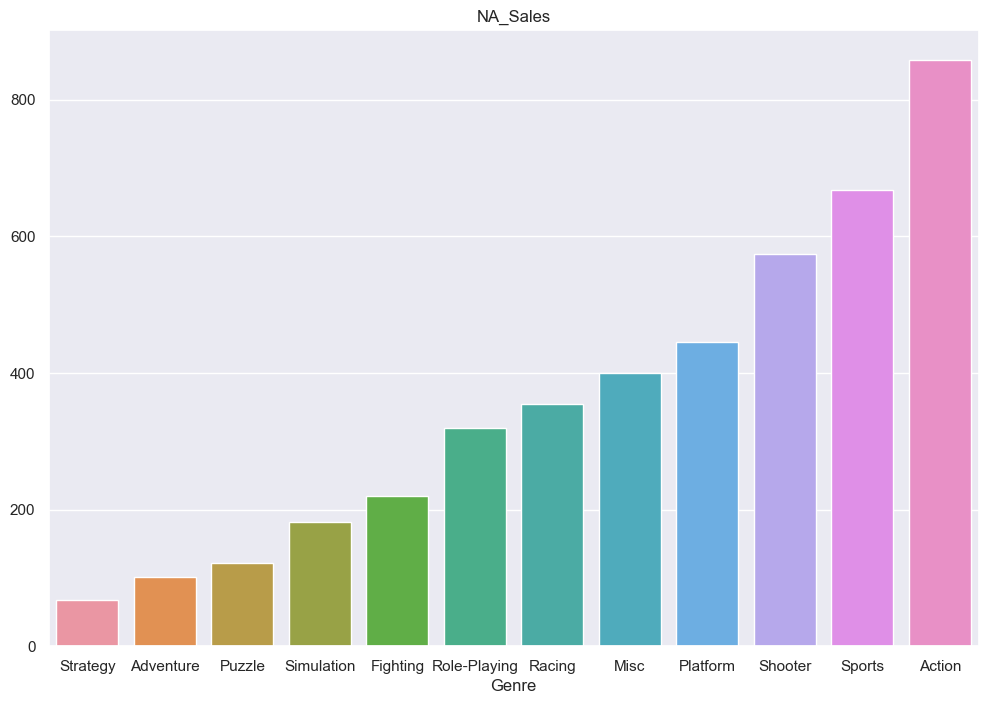

In [29]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,8)})
p = sns.barplot(x= NA_df.index, y= NA_df.values )
p.set_title("NA_Sales")

plt.savefig('NA_bar.png')

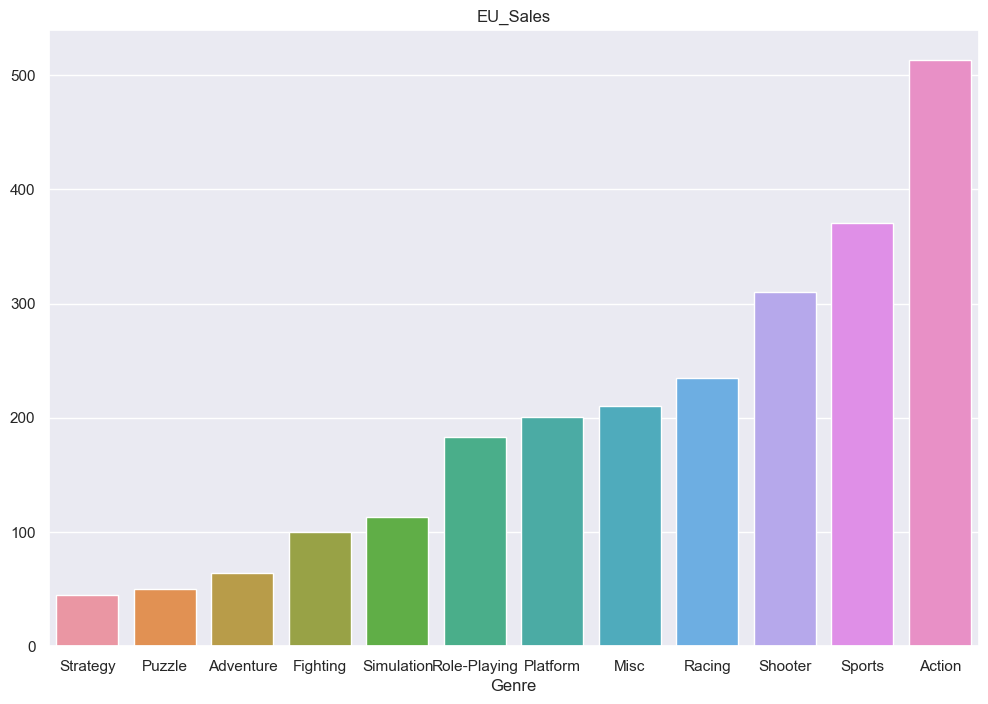

In [30]:
sns.set(rc = {'figure.figsize':(12,8)})
p = sns.barplot(x= EU_df.index, y= EU_df.values )
p.set_title("EU_Sales")

plt.savefig('EU_bar.png')

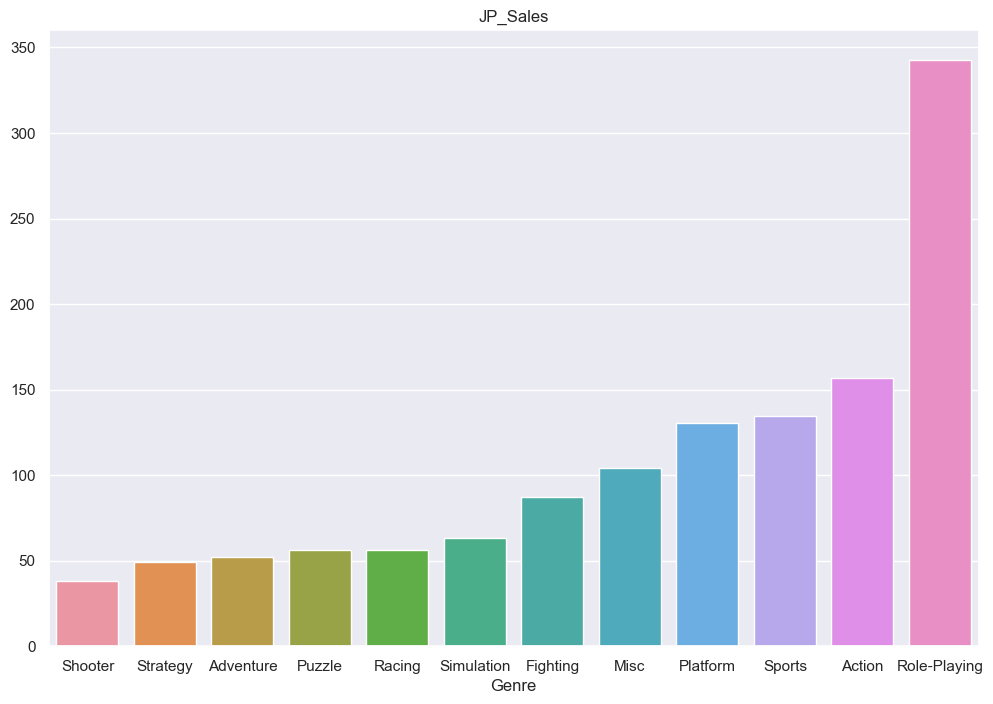

In [31]:
sns.set(rc = {'figure.figsize':(12,8)})
p = sns.barplot(x= JP_df.index, y= JP_df.values )
p.set_title("JP_Sales")

plt.savefig('JP_bar.png')

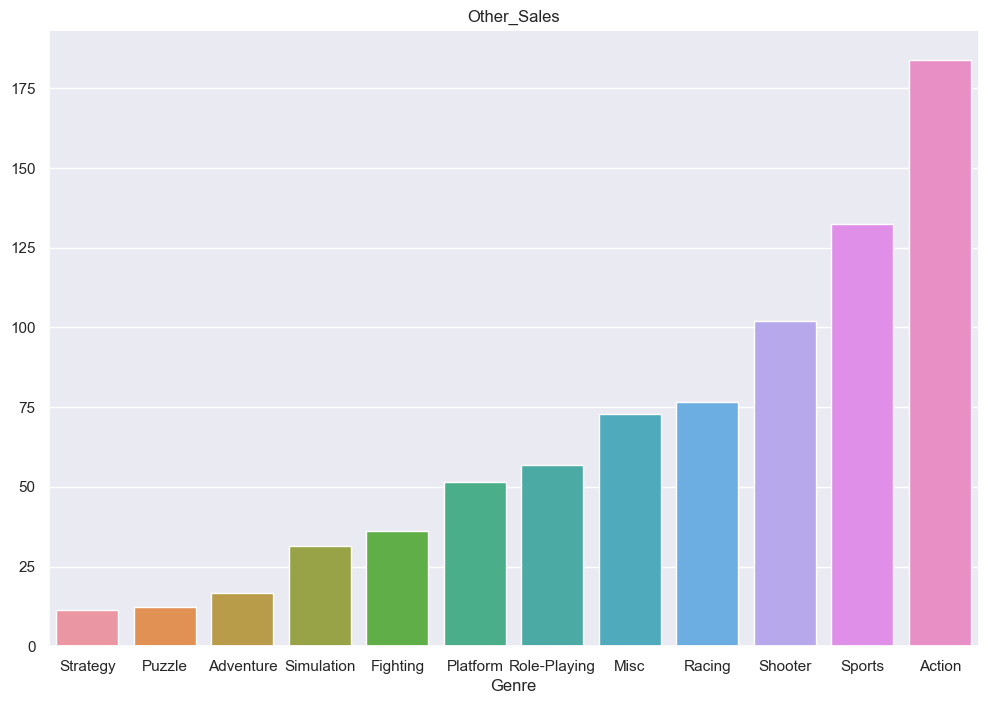

In [32]:
sns.set(rc = {'figure.figsize':(12,8)})
p = sns.barplot(x= Other_df.index, y= Other_df.values )
p.set_title("Other_Sales")

plt.savefig('Other_bar.png')

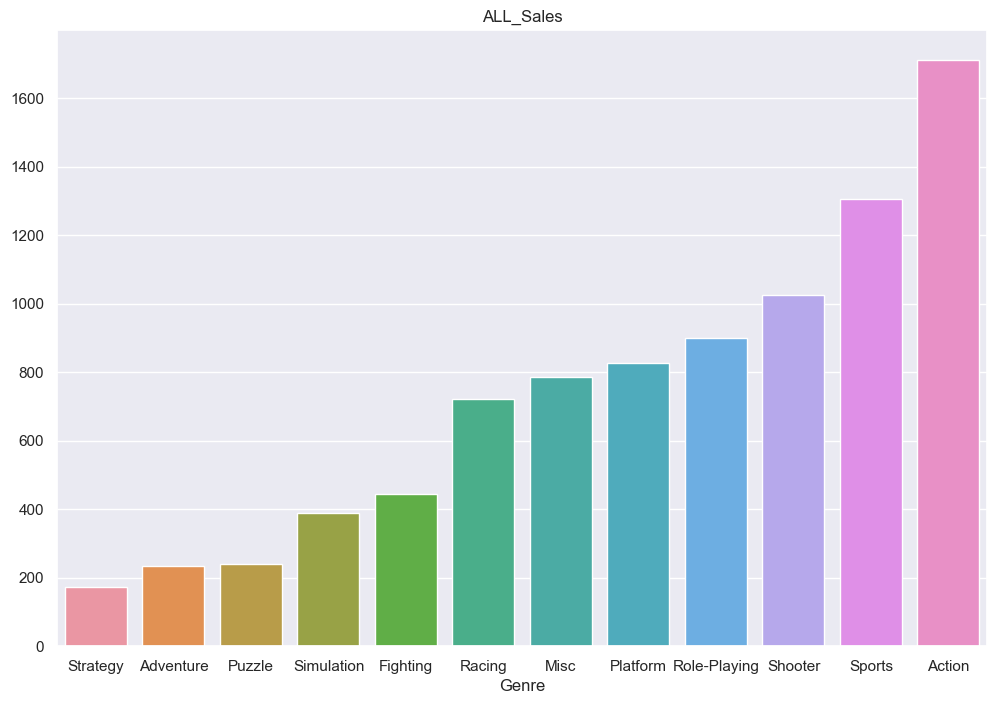

In [33]:
sns.set(rc = {'figure.figsize':(12,8)})
p = sns.barplot(x= all_df.index, y= all_df.values )
p.set_title("ALL_Sales")

plt.savefig('ALL_bar.png')

In [34]:
G_Action = df.query('Genre == "Action"')
Action = G_Action.groupby('Year')['NA_Sales'].sum()

In [35]:
G_Sports = df.query('Genre == "Sports"')
Sports = G_Sports.groupby('Year')['NA_Sales'].sum()

In [36]:
G_Shooter = df.query('Genre == "Shooter"')
Shooter = G_Shooter.groupby('Year')['NA_Sales'].sum()

In [37]:
G_Racing = df.query('Genre == "Racing"')
Racing = G_Racing.groupby('Year')['NA_Sales'].sum()

In [38]:
G_Role_Playing = df.query('Genre == "Role-Playing"')
Role_Playing = G_Role_Playing.groupby('Year')['NA_Sales'].sum()

In [39]:
G_Misc = df.query('Genre == "Misc"')
Misc = G_Misc.groupby('Year')['NA_Sales'].sum()

In [40]:
G_Fighting = df.query('Genre == "Fighting"')
Fighting = G_Fighting.groupby('Year')['NA_Sales'].sum()

In [41]:
G_Platform = df.query('Genre == "Platform"')
Platform = G_Platform.groupby('Year')['NA_Sales'].sum()

In [42]:
G_Adventure = df.query('Genre == "Adventure"')
Adventure = G_Adventure.groupby('Year')['NA_Sales'].sum()

In [43]:
G_Puzzle = df.query('Genre == "Puzzle"')
Puzzle = G_Puzzle.groupby('Year')['NA_Sales'].sum()

In [44]:
G_Strategy = df.query('Genre == "Strategy"')
Strategy = G_Strategy.groupby('Year')['NA_Sales'].sum()

In [45]:
G_Simulation = df.query('Genre == "Simulation"')
Simulation = G_Simulation.groupby('Year')['NA_Sales'].sum()

In [46]:
df_GY = pd.DataFrame([Action, Adventure, Misc, Platform, Sports, Simulation, Racing, Role_Playing, Puzzle, Strategy, Fighting, Shooter], index = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'])

In [47]:
df_GY = df_GY.fillna(0)

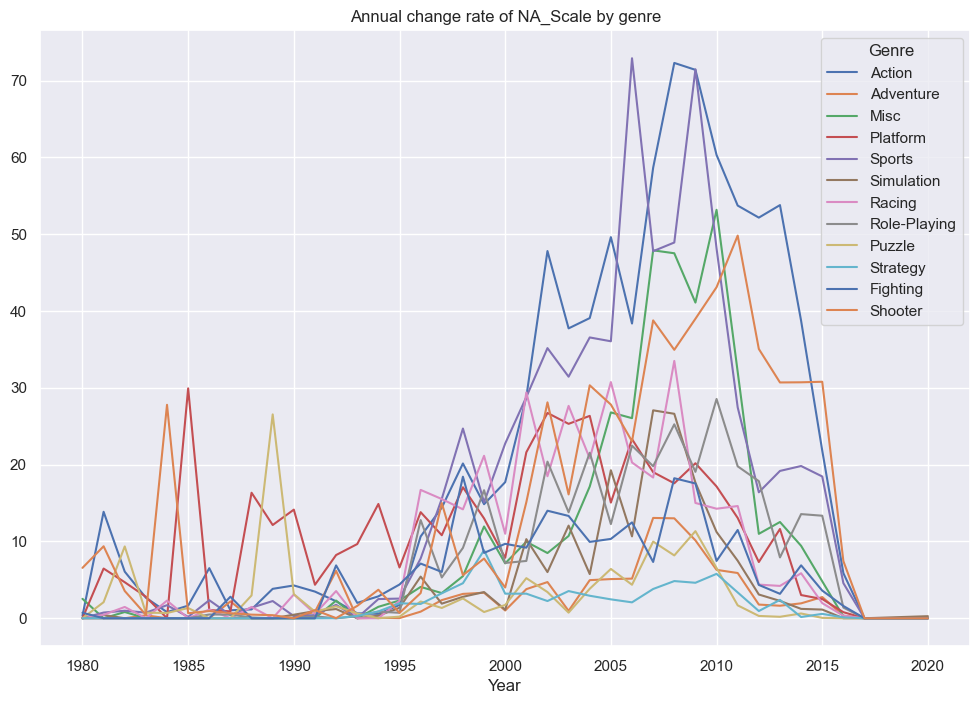

In [48]:
sns.lineplot(x=df_GY.columns, y = df_GY.values[0])
sns.lineplot(x=df_GY.columns, y = df_GY.values[1])
sns.lineplot(x=df_GY.columns, y = df_GY.values[2])
sns.lineplot(x=df_GY.columns, y = df_GY.values[3])
sns.lineplot(x=df_GY.columns, y = df_GY.values[4])
sns.lineplot(x=df_GY.columns, y = df_GY.values[5])
sns.lineplot(x=df_GY.columns, y = df_GY.values[6])
sns.lineplot(x=df_GY.columns, y = df_GY.values[7])
sns.lineplot(x=df_GY.columns, y = df_GY.values[8])
sns.lineplot(x=df_GY.columns, y = df_GY.values[9])
sns.lineplot(x=df_GY.columns, y = df_GY.values[10])
sns.lineplot(x=df_GY.columns, y = df_GY.values[11])

plt.title('Annual change rate of NA_Scale by genre')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('NA_line.png')

In [49]:
from sklearn.svm import SVR

#Action
x_Action = Action.index
y_Action = Action.values

svr = SVR()
svr_Action= svr.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

svr = SVR()
svr_Adventure= svr.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

svr = SVR()
svr_Misc= svr.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

svr = SVR()
svr_Platform= svr.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

svr = SVR()
svr_Sports= svr.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

svr = SVR()
svr_Simulation = svr.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

svr = SVR()
svr_Racing= svr.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

svr = SVR()
svr_Role_Playing= svr.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

svr = SVR()
svr_Puzzle= svr.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

svr = SVR()

svr_Strategy= svr.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

svr = SVR()
svr_Fighting= svr.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

svr = SVR()
svr_Shooter= svr.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

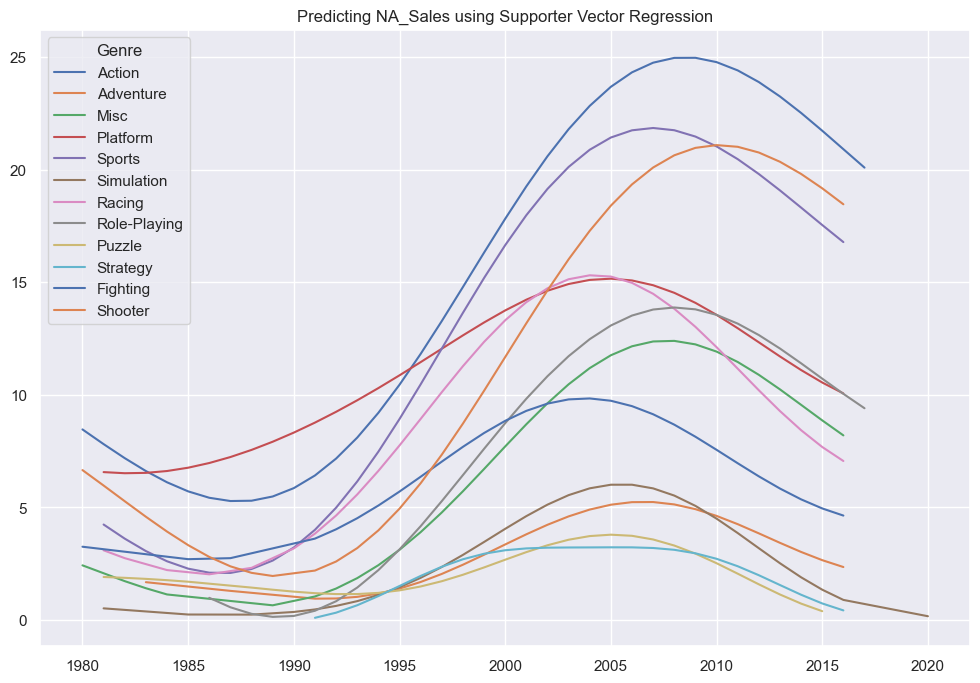

In [50]:
plt.plot(x_Action, svr_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, svr_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, svr_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, svr_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, svr_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, svr_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, svr_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, svr_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, svr_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, svr_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, svr_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, svr_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting NA_Sales using Supporter Vector Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('NA_SVR.png')

In [51]:
R_2023 = [svr_Action.predict([[2023]]), svr_Adventure.predict([[2023]]), svr_Misc.predict([[2023]]), svr_Platform.predict([[2023]]), svr_Sports.predict([[2023]]), svr_Simulation.predict([[2023]]) ,svr_Racing.predict([[2023]]), svr_Role_Playing.predict([[2023]]), svr_Puzzle.predict([[2023]]), svr_Strategy.predict([[2023]]), svr_Fighting.predict([[2023]]), svr_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)

'Action'

In [52]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

x_Action = Action.index
y_Action = Action.values

regressor_Action= regressor.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

regressor_Adventure= regressor.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

regressor_Misc= regressor.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

regressor_Platform= regressor.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

regressor_Sports= regressor.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

regressor_Simulation = regressor.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

regressor_Racing= regressor.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

regressor_Role_Playing= regressor.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

regressor_Puzzle= regressor.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

regressor_Strategy= regressor.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

regressor_Fighting= regressor.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

regressor_Shooter= regressor.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

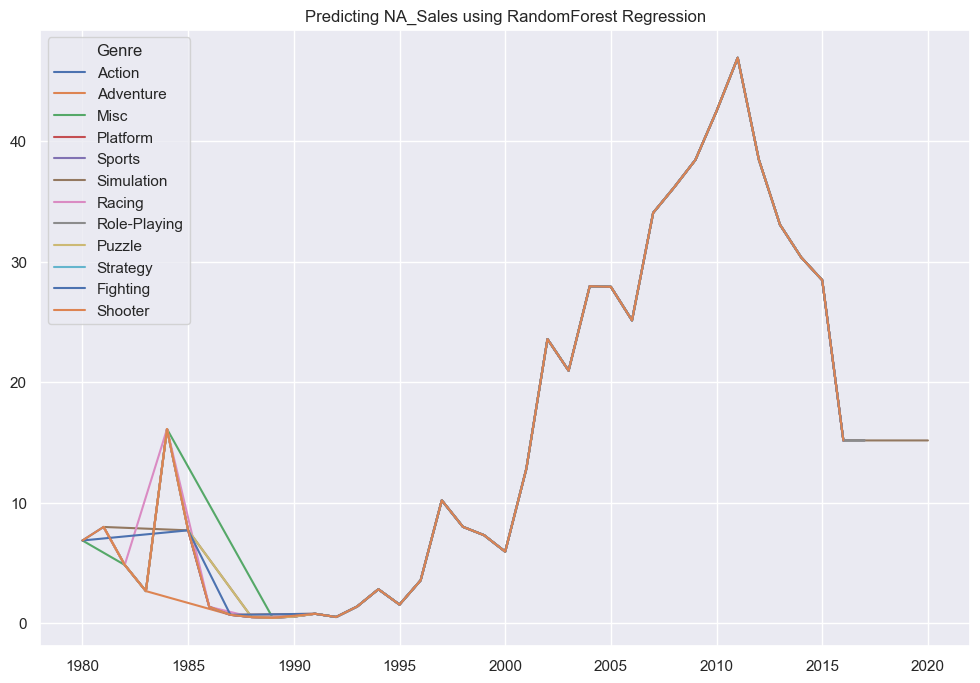

In [53]:
plt.plot(x_Action, regressor_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, regressor_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, regressor_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, regressor_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, regressor_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, regressor_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, regressor_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, regressor_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, regressor_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, regressor_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, regressor_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, regressor_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting NA_Sales using RandomForest Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('NA_regressor.png')

In [54]:
R_2023 = [regressor_Action.predict([[2023]]), regressor_Adventure.predict([[2023]]), regressor_Misc.predict([[2023]]), regressor_Platform.predict([[2023]]), regressor_Sports.predict([[2023]]), regressor_Simulation.predict([[2023]]) ,regressor_Racing.predict([[2023]]), regressor_Role_Playing.predict([[2023]]), regressor_Puzzle.predict([[2023]]), regressor_Strategy.predict([[2023]]), regressor_Fighting.predict([[2023]]), regressor_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)
R2203_dict

{'Action': array([15.1822]),
 'Adventure': array([15.1822]),
 'Misc': array([15.1822]),
 'Platform': array([15.1822]),
 'Sports': array([15.1822]),
 'Simulation': array([15.1822]),
 'Racing': array([15.1822]),
 'Role-Playing': array([15.1822]),
 'Puzzle': array([15.1822]),
 'Strategy': array([15.1822]),
 'Fighting': array([15.1822]),
 'Shooter': array([15.1822])}

In [55]:
G_Action = df.query('Genre == "Action"')
Action = G_Action.groupby('Year')['EU_Sales'].sum()

G_Sports = df.query('Genre == "Sports"')
Sports = G_Sports.groupby('Year')['EU_Sales'].sum()

G_Shooter = df.query('Genre == "Shooter"')
Shooter = G_Shooter.groupby('Year')['EU_Sales'].sum()

G_Racing = df.query('Genre == "Racing"')
Racing = G_Racing.groupby('Year')['EU_Sales'].sum()

G_Role_Playing = df.query('Genre == "Role-Playing"')
Role_Playing = G_Role_Playing.groupby('Year')['EU_Sales'].sum()

G_Misc = df.query('Genre == "Misc"')
Misc = G_Misc.groupby('Year')['EU_Sales'].sum()

G_Fighting = df.query('Genre == "Fighting"')
Fighting = G_Fighting.groupby('Year')['EU_Sales'].sum()

G_Platform = df.query('Genre == "Platform"')
Platform = G_Platform.groupby('Year')['EU_Sales'].sum()

G_Adventure = df.query('Genre == "Adventure"')
Adventure = G_Adventure.groupby('Year')['EU_Sales'].sum()

G_Puzzle = df.query('Genre == "Puzzle"')
Puzzle = G_Puzzle.groupby('Year')['EU_Sales'].sum()

G_Strategy = df.query('Genre == "Strategy"')
Strategy = G_Strategy.groupby('Year')['EU_Sales'].sum()

G_Simulation = df.query('Genre == "Simulation"')
Simulation = G_Simulation.groupby('Year')['EU_Sales'].sum()

In [56]:
df_GYE = pd.DataFrame([Action, Adventure, Misc, Platform, Sports, Simulation, Racing, Role_Playing, Puzzle, Strategy, Fighting, Shooter], index = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'])

In [57]:
df_GYE = df_GYE.fillna(0)

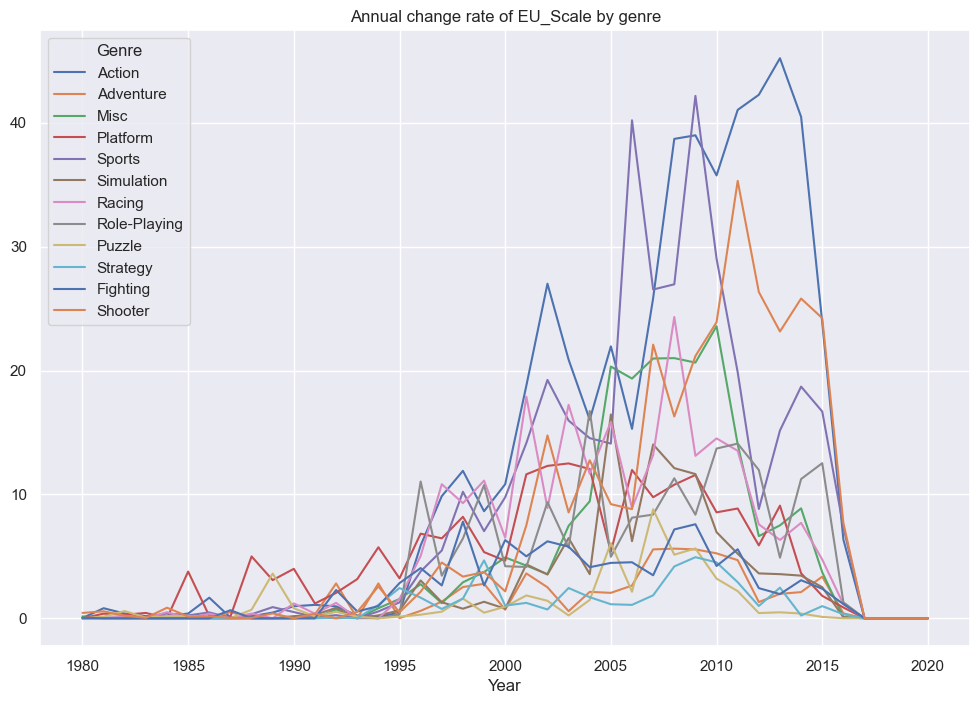

In [58]:
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[0])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[1])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[2])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[3])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[4])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[5])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[6])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[7])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[8])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[9])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[10])
sns.lineplot(x=df_GYE.columns, y = df_GYE.values[11])

plt.title('Annual change rate of EU_Scale by genre')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('EU_line.png')

In [59]:
#Action
x_Action = Action.index
y_Action = Action.values

svr = SVR()
svr_Action= svr.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

svr = SVR()
svr_Adventure= svr.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

svr = SVR()
svr_Misc= svr.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

svr = SVR()
svr_Platform= svr.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

svr = SVR()
svr_Sports= svr.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

svr = SVR()
svr_Simulation = svr.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

svr = SVR()
svr_Racing= svr.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

svr = SVR()
svr_Role_Playing= svr.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

svr = SVR()
svr_Puzzle= svr.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

svr = SVR()

svr_Strategy= svr.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

svr = SVR()
svr_Fighting= svr.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

svr = SVR()
svr_Shooter= svr.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

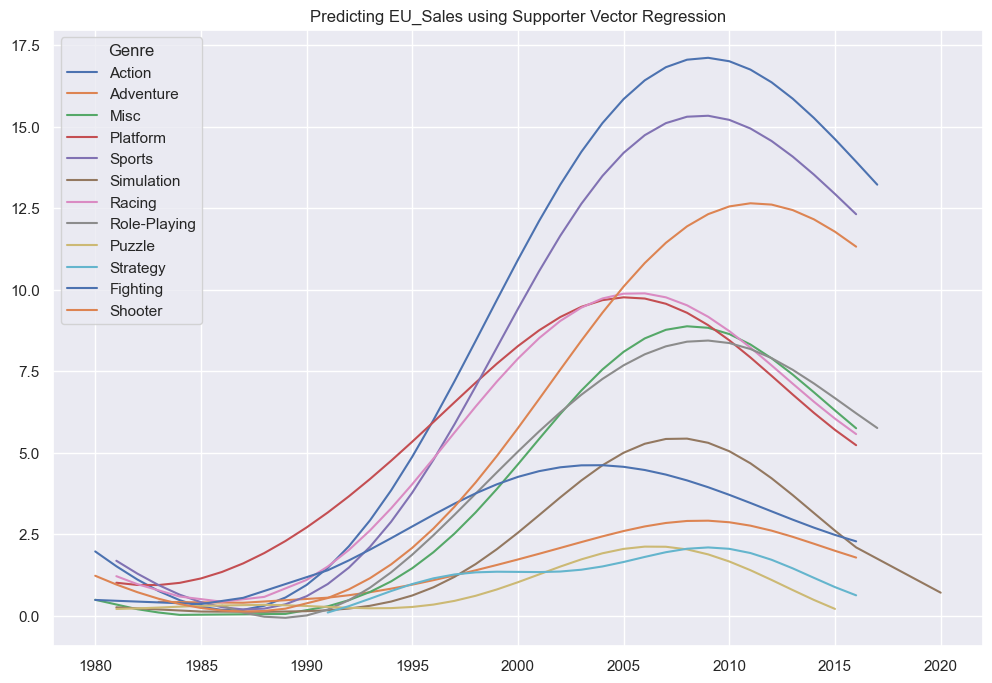

In [60]:
plt.plot(x_Action, svr_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, svr_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, svr_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, svr_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, svr_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, svr_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, svr_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, svr_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, svr_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, svr_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, svr_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, svr_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting EU_Sales using Supporter Vector Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('EU_SVR.png')

In [61]:
R_2023 = [svr_Action.predict([[2023]]), svr_Adventure.predict([[2023]]), svr_Misc.predict([[2023]]), svr_Platform.predict([[2023]]), svr_Sports.predict([[2023]]), svr_Simulation.predict([[2023]]) ,svr_Racing.predict([[2023]]), svr_Role_Playing.predict([[2023]]), svr_Puzzle.predict([[2023]]), svr_Strategy.predict([[2023]]), svr_Fighting.predict([[2023]]), svr_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)

'Action'

In [62]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

x_Action = Action.index
y_Action = Action.values

regressor_Action= regressor.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

regressor_Adventure= regressor.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

regressor_Misc= regressor.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

regressor_Platform= regressor.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

regressor_Sports= regressor.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

regressor_Simulation = regressor.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

regressor_Racing= regressor.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

regressor_Role_Playing= regressor.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

regressor_Puzzle= regressor.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

regressor_Strategy= regressor.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

regressor_Fighting= regressor.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

regressor_Shooter= regressor.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

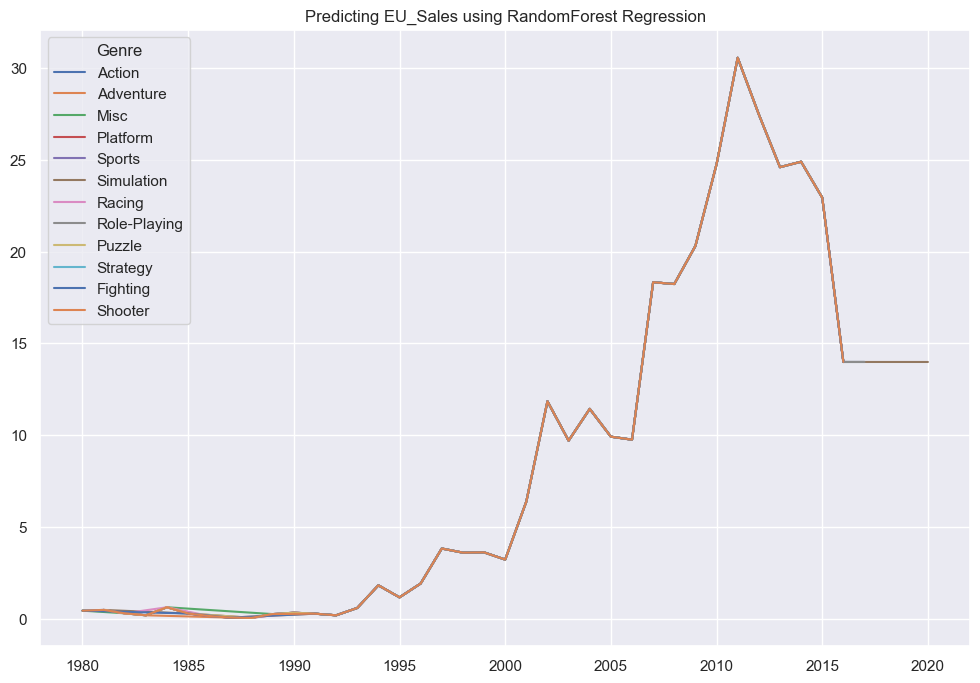

In [63]:
plt.plot(x_Action, regressor_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, regressor_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, regressor_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, regressor_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, regressor_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, regressor_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, regressor_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, regressor_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, regressor_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, regressor_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, regressor_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, regressor_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting EU_Sales using RandomForest Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('EU_regressor.png')

In [64]:
R_2023 = [regressor_Action.predict([[2023]]), regressor_Adventure.predict([[2023]]), regressor_Misc.predict([[2023]]), regressor_Platform.predict([[2023]]), regressor_Sports.predict([[2023]]), regressor_Simulation.predict([[2023]]) ,regressor_Racing.predict([[2023]]), regressor_Role_Playing.predict([[2023]]), regressor_Puzzle.predict([[2023]]), regressor_Strategy.predict([[2023]]), regressor_Fighting.predict([[2023]]), regressor_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)
R2203_dict

{'Action': array([13.9841]),
 'Adventure': array([13.9841]),
 'Misc': array([13.9841]),
 'Platform': array([13.9841]),
 'Sports': array([13.9841]),
 'Simulation': array([13.9841]),
 'Racing': array([13.9841]),
 'Role-Playing': array([13.9841]),
 'Puzzle': array([13.9841]),
 'Strategy': array([13.9841]),
 'Fighting': array([13.9841]),
 'Shooter': array([13.9841])}

In [65]:
G_Action = df.query('Genre == "Action"')
Action = G_Action.groupby('Year')['JP_Sales'].sum()

G_Sports = df.query('Genre == "Sports"')
Sports = G_Sports.groupby('Year')['JP_Sales'].sum()

G_Shooter = df.query('Genre == "Shooter"')
Shooter = G_Shooter.groupby('Year')['JP_Sales'].sum()

G_Racing = df.query('Genre == "Racing"')
Racing = G_Racing.groupby('Year')['JP_Sales'].sum()

G_Role_Playing = df.query('Genre == "Role-Playing"')
Role_Playing = G_Role_Playing.groupby('Year')['JP_Sales'].sum()

G_Misc = df.query('Genre == "Misc"')
Misc = G_Misc.groupby('Year')['JP_Sales'].sum()

G_Fighting = df.query('Genre == "Fighting"')
Fighting = G_Fighting.groupby('Year')['JP_Sales'].sum()

G_Platform = df.query('Genre == "Platform"')
Platform = G_Platform.groupby('Year')['JP_Sales'].sum()

G_Adventure = df.query('Genre == "Adventure"')
Adventure = G_Adventure.groupby('Year')['JP_Sales'].sum()

G_Puzzle = df.query('Genre == "Puzzle"')
Puzzle = G_Puzzle.groupby('Year')['JP_Sales'].sum()

G_Strategy = df.query('Genre == "Strategy"')
Strategy = G_Strategy.groupby('Year')['JP_Sales'].sum()

G_Simulation = df.query('Genre == "Simulation"')
Simulation = G_Simulation.groupby('Year')['JP_Sales'].sum()

In [66]:
df_GYJ = pd.DataFrame([Action, Adventure, Misc, Platform, Sports, Simulation, Racing, Role_Playing, Puzzle, Strategy, Fighting, Shooter], index = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'])

In [67]:
df_GYJ = df_GYJ.fillna(0)

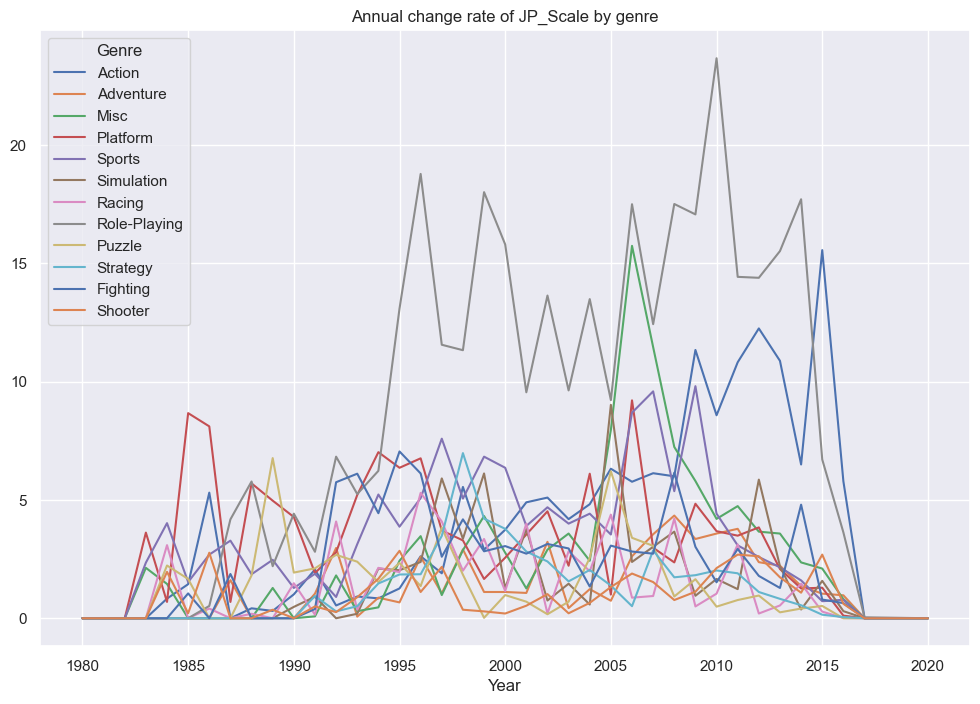

In [68]:
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[0])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[1])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[2])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[3])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[4])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[5])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[6])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[7])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[8])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[9])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[10])
sns.lineplot(x=df_GYJ.columns, y = df_GYJ.values[11])

plt.title('Annual change rate of JP_Scale by genre')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('JP_line.png')

In [69]:
#Action
x_Action = Action.index
y_Action = Action.values

svr = SVR()
svr_Action= svr.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

svr = SVR()
svr_Adventure= svr.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

svr = SVR()
svr_Misc= svr.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

svr = SVR()
svr_Platform= svr.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

svr = SVR()
svr_Sports= svr.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

svr = SVR()
svr_Simulation = svr.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

svr = SVR()
svr_Racing= svr.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

svr = SVR()
svr_Role_Playing= svr.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

svr = SVR()
svr_Puzzle= svr.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

svr = SVR()

svr_Strategy= svr.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

svr = SVR()
svr_Fighting= svr.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

svr = SVR()
svr_Shooter= svr.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

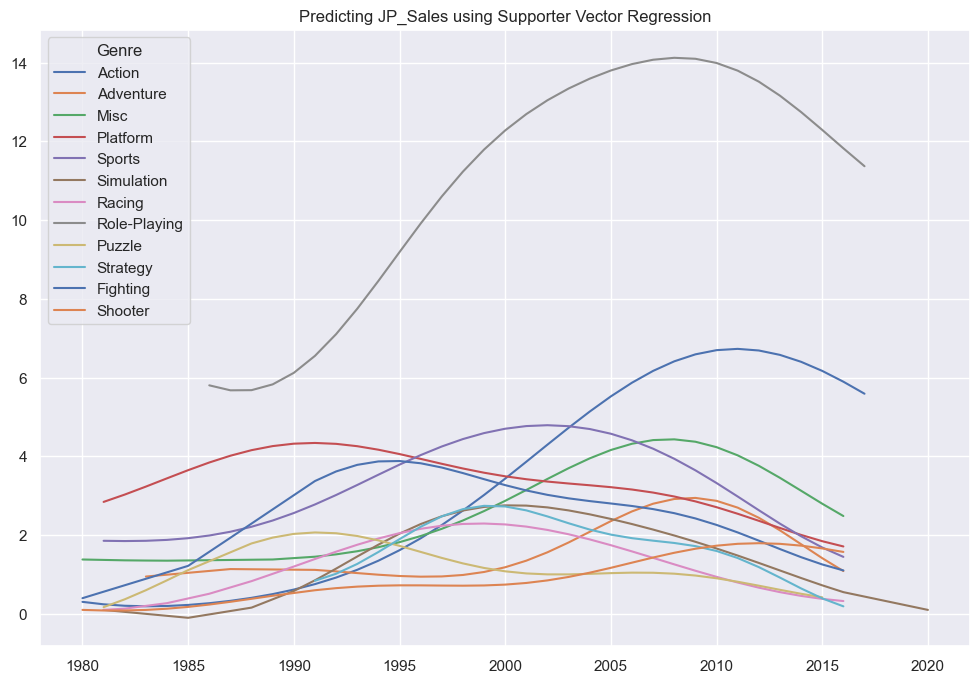

In [70]:
plt.plot(x_Action, svr_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, svr_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, svr_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, svr_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, svr_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, svr_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, svr_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, svr_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, svr_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, svr_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, svr_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, svr_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting JP_Sales using Supporter Vector Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('JP_SVR.png')

In [71]:
R_2023 = [svr_Action.predict([[2023]]), svr_Adventure.predict([[2023]]), svr_Misc.predict([[2023]]), svr_Platform.predict([[2023]]), svr_Sports.predict([[2023]]), svr_Simulation.predict([[2023]]) ,svr_Racing.predict([[2023]]), svr_Role_Playing.predict([[2023]]), svr_Puzzle.predict([[2023]]), svr_Strategy.predict([[2023]]), svr_Fighting.predict([[2023]]), svr_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)

'Role-Playing'

In [72]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

x_Action = Action.index
y_Action = Action.values

regressor_Action= regressor.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

regressor_Adventure= regressor.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

regressor_Misc= regressor.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

regressor_Platform= regressor.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

regressor_Sports= regressor.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

regressor_Simulation = regressor.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

regressor_Racing= regressor.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

regressor_Role_Playing= regressor.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

regressor_Puzzle= regressor.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

regressor_Strategy= regressor.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

regressor_Fighting= regressor.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

regressor_Shooter= regressor.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

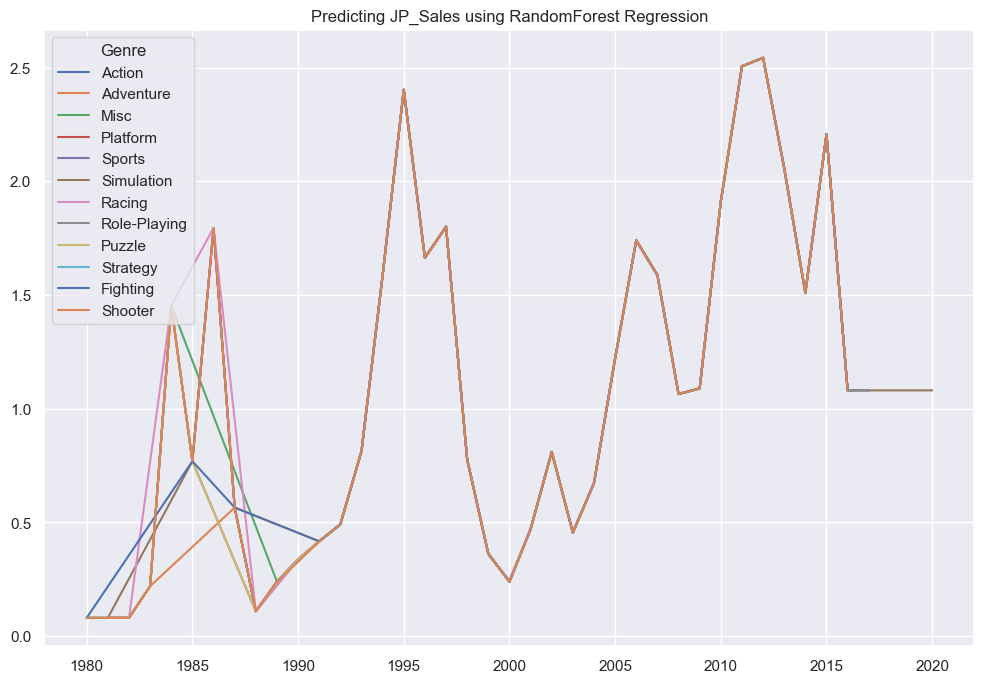

In [73]:
plt.plot(x_Action, regressor_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, regressor_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, regressor_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, regressor_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, regressor_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, regressor_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, regressor_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, regressor_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, regressor_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, regressor_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, regressor_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, regressor_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting JP_Sales using RandomForest Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('JP_regressor.png')

In [74]:
R_2023 = [regressor_Action.predict([[2023]]), regressor_Adventure.predict([[2023]]), regressor_Misc.predict([[2023]]), regressor_Platform.predict([[2023]]), regressor_Sports.predict([[2023]]), regressor_Simulation.predict([[2023]]) ,regressor_Racing.predict([[2023]]), regressor_Role_Playing.predict([[2023]]), regressor_Puzzle.predict([[2023]]), regressor_Strategy.predict([[2023]]), regressor_Fighting.predict([[2023]]), regressor_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)

'Action'

In [75]:
G_Action = df.query('Genre == "Action"')
Action = G_Action.groupby('Year')['Other_Sales'].sum()

G_Sports = df.query('Genre == "Sports"')
Sports = G_Sports.groupby('Year')['Other_Sales'].sum()

G_Shooter = df.query('Genre == "Shooter"')
Shooter = G_Shooter.groupby('Year')['Other_Sales'].sum()

G_Racing = df.query('Genre == "Racing"')
Racing = G_Racing.groupby('Year')['Other_Sales'].sum()

G_Role_Playing = df.query('Genre == "Role-Playing"')
Role_Playing = G_Role_Playing.groupby('Year')['Other_Sales'].sum()

G_Misc = df.query('Genre == "Misc"')
Misc = G_Misc.groupby('Year')['Other_Sales'].sum()

G_Fighting = df.query('Genre == "Fighting"')
Fighting = G_Fighting.groupby('Year')['Other_Sales'].sum()

G_Platform = df.query('Genre == "Platform"')
Platform = G_Platform.groupby('Year')['Other_Sales'].sum()

G_Adventure = df.query('Genre == "Adventure"')
Adventure = G_Adventure.groupby('Year')['Other_Sales'].sum()

G_Puzzle = df.query('Genre == "Puzzle"')
Puzzle = G_Puzzle.groupby('Year')['Other_Sales'].sum()

G_Strategy = df.query('Genre == "Strategy"')
Strategy = G_Strategy.groupby('Year')['Other_Sales'].sum()

G_Simulation = df.query('Genre == "Simulation"')
Simulation = G_Simulation.groupby('Year')['Other_Sales'].sum()

In [76]:
df_GYO = pd.DataFrame([Action, Adventure, Misc, Platform, Sports, Simulation, Racing, Role_Playing, Puzzle, Strategy, Fighting, Shooter], index = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'])

In [77]:
df_GYO = df_GYO.fillna(0)

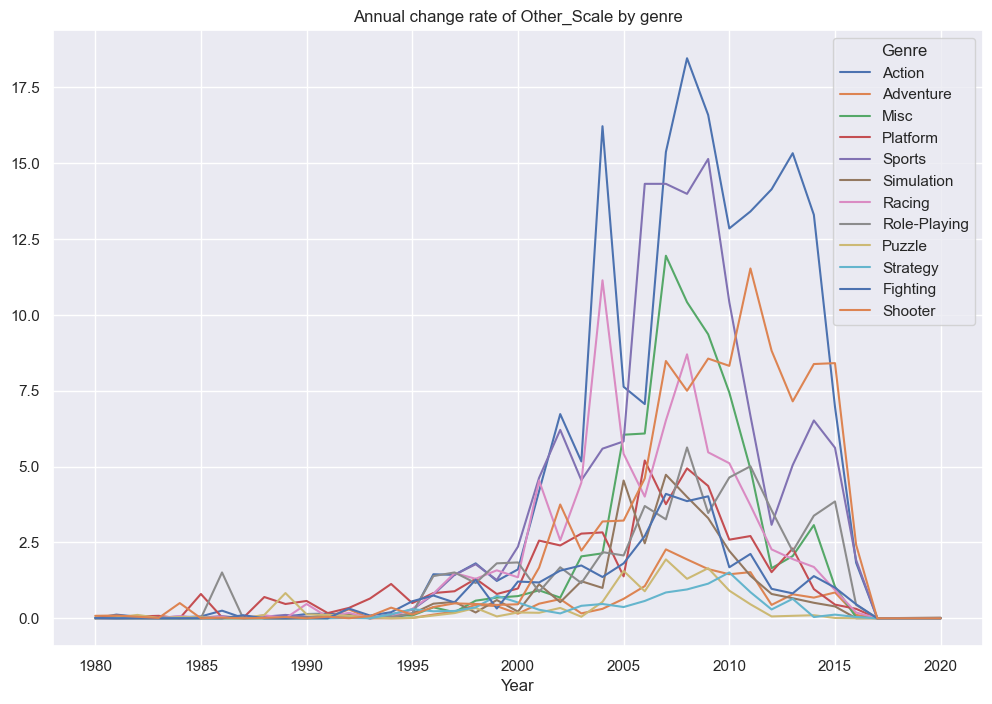

In [78]:
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[0])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[1])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[2])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[3])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[4])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[5])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[6])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[7])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[8])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[9])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[10])
sns.lineplot(x=df_GYO.columns, y = df_GYO.values[11])

plt.title('Annual change rate of Other_Scale by genre')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('Other_line.png')

In [79]:
#Action
x_Action = Action.index
y_Action = Action.values

svr = SVR()
svr_Action= svr.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

svr = SVR()
svr_Adventure= svr.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

svr = SVR()
svr_Misc= svr.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

svr = SVR()
svr_Platform= svr.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

svr = SVR()
svr_Sports= svr.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

svr = SVR()
svr_Simulation = svr.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

svr = SVR()
svr_Racing= svr.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

svr = SVR()
svr_Role_Playing= svr.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

svr = SVR()
svr_Puzzle= svr.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

svr = SVR()

svr_Strategy= svr.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

svr = SVR()
svr_Fighting= svr.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

svr = SVR()
svr_Shooter= svr.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

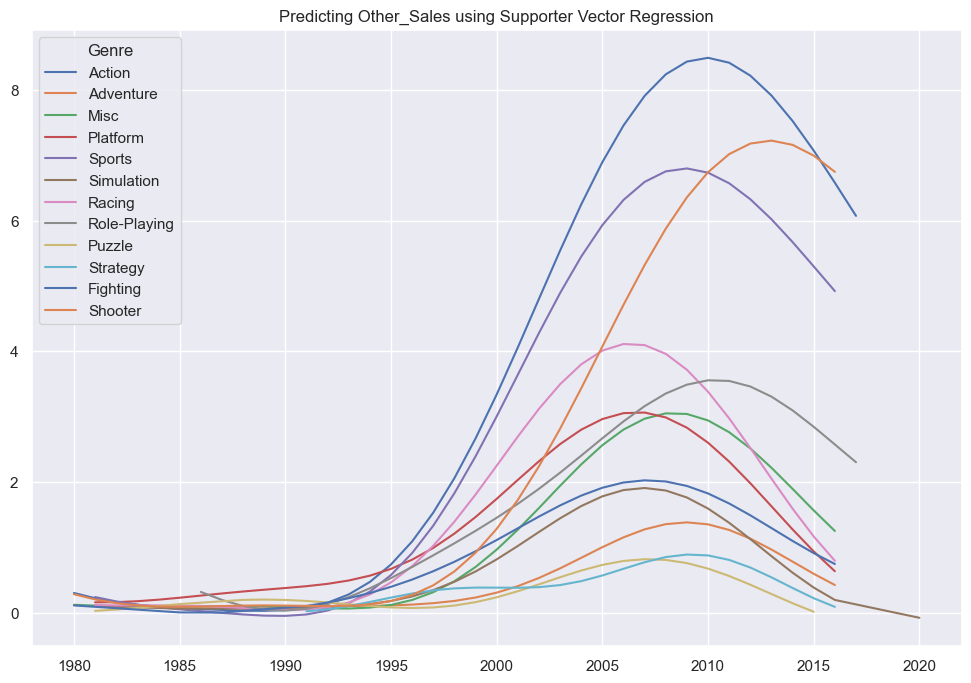

In [80]:
plt.plot(x_Action, svr_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, svr_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, svr_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, svr_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, svr_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, svr_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, svr_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, svr_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, svr_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, svr_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, svr_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, svr_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting Other_Sales using Supporter Vector Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('Other_SVR.png')

In [81]:
R_2023 = [svr_Action.predict([[2023]]), svr_Adventure.predict([[2023]]), svr_Misc.predict([[2023]]), svr_Platform.predict([[2023]]), svr_Sports.predict([[2023]]), svr_Simulation.predict([[2023]]) ,svr_Racing.predict([[2023]]), svr_Role_Playing.predict([[2023]]), svr_Puzzle.predict([[2023]]), svr_Strategy.predict([[2023]]), svr_Fighting.predict([[2023]]), svr_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)

'Shooter'

In [82]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

x_Action = Action.index
y_Action = Action.values

regressor_Action= regressor.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

regressor_Adventure= regressor.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

regressor_Misc= regressor.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

regressor_Platform= regressor.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

regressor_Sports= regressor.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

regressor_Simulation = regressor.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

regressor_Racing= regressor.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

regressor_Role_Playing= regressor.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

regressor_Puzzle= regressor.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

regressor_Strategy= regressor.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

regressor_Fighting= regressor.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

regressor_Shooter= regressor.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

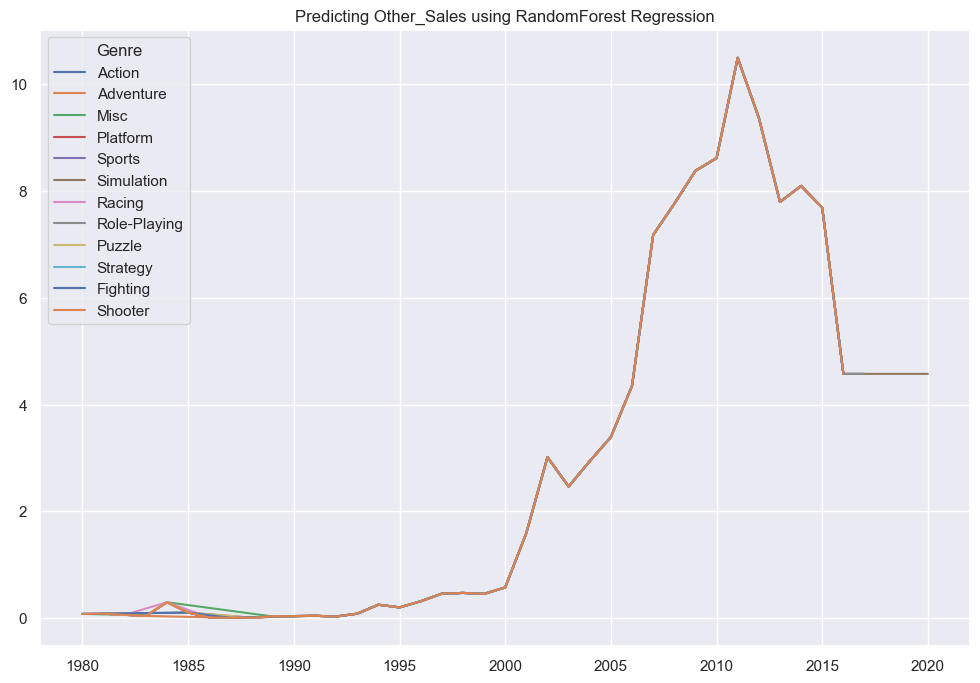

In [83]:
plt.plot(x_Action, regressor_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, regressor_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, regressor_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, regressor_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, regressor_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, regressor_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, regressor_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, regressor_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, regressor_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, regressor_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, regressor_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, regressor_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting Other_Sales using RandomForest Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('Other_regressor.png')

In [84]:
R_2023 = [regressor_Action.predict([[2023]]), regressor_Adventure.predict([[2023]]), regressor_Misc.predict([[2023]]), regressor_Platform.predict([[2023]]), regressor_Sports.predict([[2023]]), regressor_Simulation.predict([[2023]]) ,regressor_Racing.predict([[2023]]), regressor_Role_Playing.predict([[2023]]), regressor_Puzzle.predict([[2023]]), regressor_Strategy.predict([[2023]]), regressor_Fighting.predict([[2023]]), regressor_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)

'Action'

In [85]:
G_Action = df.query('Genre == "Action"')
Action = G_Action.groupby('Year')['all_Sales'].sum()

G_Sports = df.query('Genre == "Sports"')
Sports = G_Sports.groupby('Year')['all_Sales'].sum()

G_Shooter = df.query('Genre == "Shooter"')
Shooter = G_Shooter.groupby('Year')['all_Sales'].sum()

G_Racing = df.query('Genre == "Racing"')
Racing = G_Racing.groupby('Year')['all_Sales'].sum()

G_Role_Playing = df.query('Genre == "Role-Playing"')
Role_Playing = G_Role_Playing.groupby('Year')['all_Sales'].sum()

G_Misc = df.query('Genre == "Misc"')
Misc = G_Misc.groupby('Year')['all_Sales'].sum()

G_Fighting = df.query('Genre == "Fighting"')
Fighting = G_Fighting.groupby('Year')['all_Sales'].sum()

G_Platform = df.query('Genre == "Platform"')
Platform = G_Platform.groupby('Year')['all_Sales'].sum()

G_Adventure = df.query('Genre == "Adventure"')
Adventure = G_Adventure.groupby('Year')['all_Sales'].sum()

G_Puzzle = df.query('Genre == "Puzzle"')
Puzzle = G_Puzzle.groupby('Year')['all_Sales'].sum()

G_Strategy = df.query('Genre == "Strategy"')
Strategy = G_Strategy.groupby('Year')['all_Sales'].sum()

G_Simulation = df.query('Genre == "Simulation"')
Simulation = G_Simulation.groupby('Year')['all_Sales'].sum()

In [86]:
df_GYA = pd.DataFrame([Action, Adventure, Misc, Platform, Sports, Simulation, Racing, Role_Playing, Puzzle, Strategy, Fighting, Shooter], index = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'])

In [87]:
df_GYA = df_GYA.fillna(0)

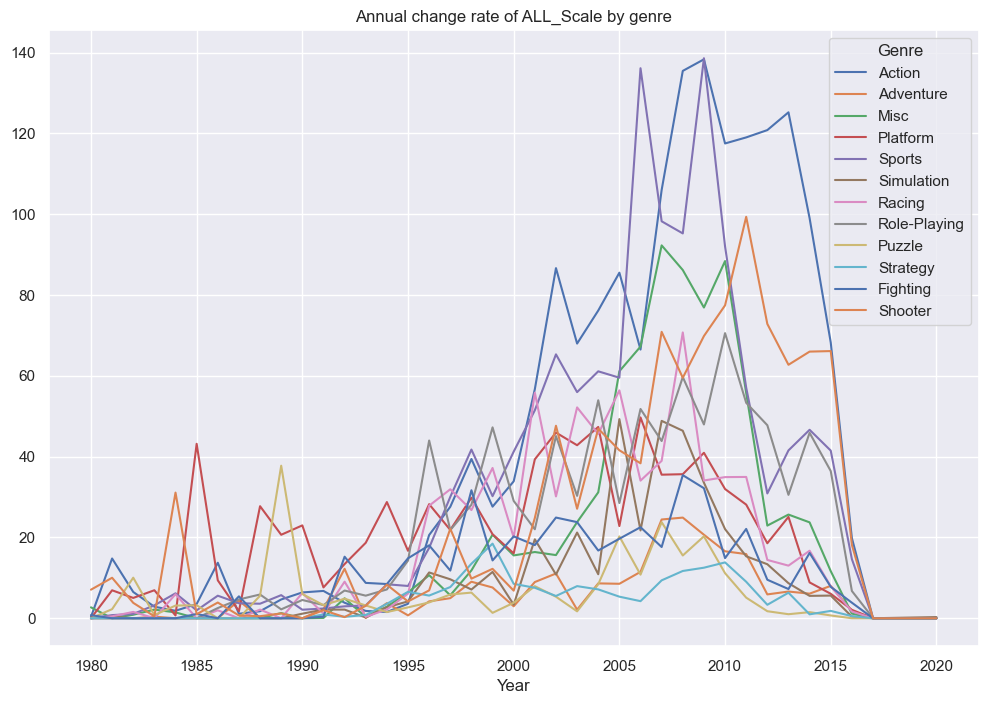

In [88]:
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[0])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[1])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[2])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[3])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[4])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[5])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[6])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[7])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[8])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[9])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[10])
sns.lineplot(x=df_GYA.columns, y = df_GYA.values[11])

plt.title('Annual change rate of ALL_Scale by genre')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('ALL_line.png')

In [89]:
#Action
x_Action = Action.index
y_Action = Action.values

svr = SVR()
svr_Action= svr.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

svr = SVR()
svr_Adventure= svr.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

svr = SVR()
svr_Misc= svr.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

svr = SVR()
svr_Platform= svr.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

svr = SVR()
svr_Sports= svr.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

svr = SVR()
svr_Simulation = svr.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

svr = SVR()
svr_Racing= svr.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

svr = SVR()
svr_Role_Playing= svr.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

svr = SVR()
svr_Puzzle= svr.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

svr = SVR()

svr_Strategy= svr.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

svr = SVR()
svr_Fighting= svr.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

svr = SVR()
svr_Shooter= svr.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

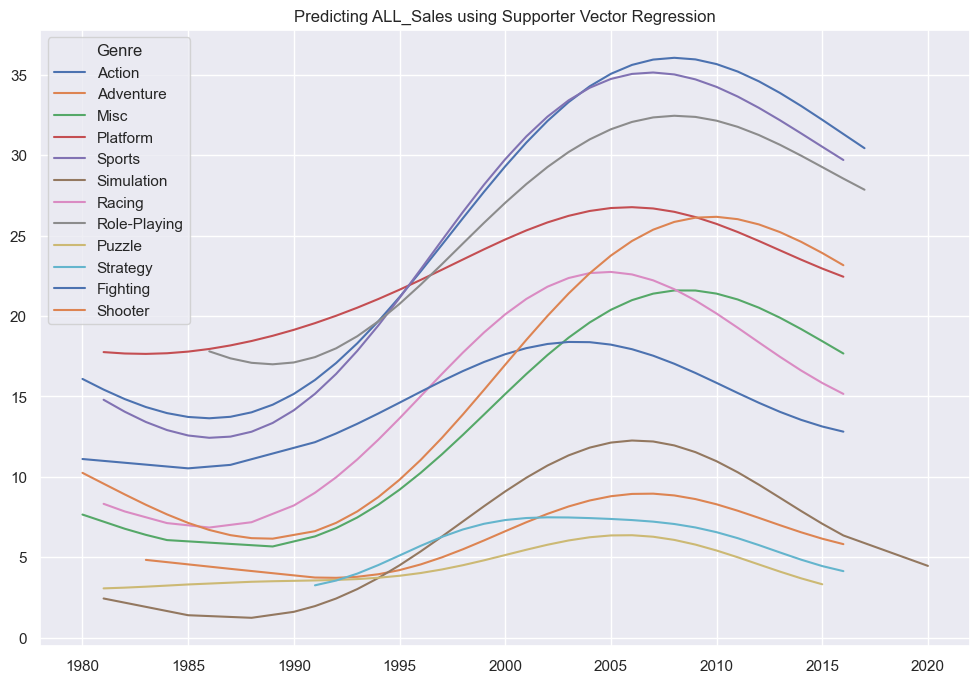

In [90]:
plt.plot(x_Action, svr_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, svr_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, svr_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, svr_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, svr_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, svr_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, svr_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, svr_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, svr_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, svr_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, svr_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, svr_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting ALL_Sales using Supporter Vector Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('ALL_SVR.png')

In [96]:
R_2023 = [svr_Action.predict([[2023]]), svr_Adventure.predict([[2023]]), svr_Misc.predict([[2023]]), svr_Platform.predict([[2023]]), svr_Sports.predict([[2023]]), svr_Simulation.predict([[2023]]) ,svr_Racing.predict([[2023]]), svr_Role_Playing.predict([[2023]]), svr_Puzzle.predict([[2023]]), svr_Strategy.predict([[2023]]), svr_Fighting.predict([[2023]]), svr_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)

'Action'

In [92]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

x_Action = Action.index
y_Action = Action.values

regressor_Action= regressor.fit(x_Action.values.reshape(-1,1), y_Action)

#Adventure
x_Adventure = Adventure.index
y_Adventure = Adventure.values

regressor_Adventure= regressor.fit(x_Adventure.values.reshape(-1,1), y_Adventure)

#Misc
x_Misc = Misc.index
y_Misc = Misc.values

regressor_Misc= regressor.fit(x_Misc.values.reshape(-1,1), y_Misc)

#Platform
x_Platform = Platform.index
y_Platform = Platform.values

regressor_Platform= regressor.fit(x_Platform.values.reshape(-1,1), y_Platform)

#Sports
x_Sports = Sports.index
y_Sports = Sports.values

regressor_Sports= regressor.fit(x_Sports.values.reshape(-1,1), y_Sports)

#Simulation
x_Simulation = Simulation.index
y_Simulation = Simulation.values

regressor_Simulation = regressor.fit(x_Simulation.values.reshape(-1,1), y_Simulation)

#Racing
x_Racing = Racing.index
y_Racing = Racing.values

regressor_Racing= regressor.fit(x_Racing.values.reshape(-1,1), y_Racing)

#Role_Playing
x_Role_Playing = Role_Playing.index
y_Role_Playing = Role_Playing.values

regressor_Role_Playing= regressor.fit(x_Role_Playing.values.reshape(-1,1), y_Role_Playing)

#Puzzle
x_Puzzle = Puzzle.index
y_Puzzle = Puzzle.values

regressor_Puzzle= regressor.fit(x_Puzzle.values.reshape(-1,1), y_Puzzle)

#Strategy
x_Strategy = Strategy.index
y_Strategy = Strategy.values

regressor_Strategy= regressor.fit(x_Strategy.values.reshape(-1,1), y_Strategy)

#Fighting
x_Fighting = Fighting.index
y_Fighting = Fighting.values

regressor_Fighting= regressor.fit(x_Fighting.values.reshape(-1,1), y_Fighting)

#Shooter
x_Shooter = Shooter.index
y_Shooter = Shooter.values

regressor_Shooter= regressor.fit(x_Shooter.values.reshape(-1,1), y_Shooter)

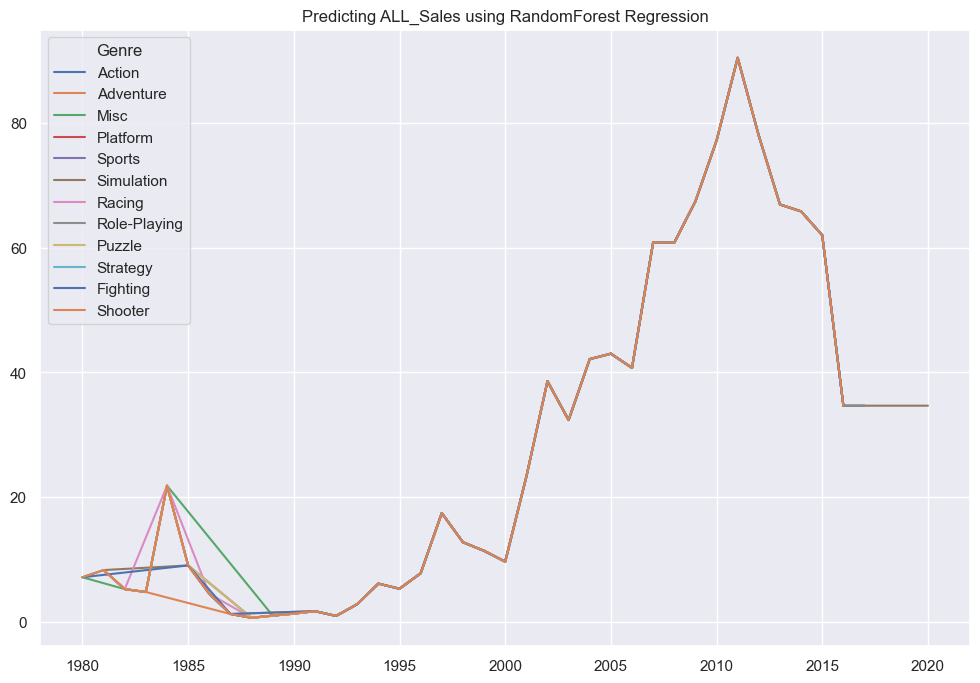

In [93]:
plt.plot(x_Action, regressor_Action.predict(x_Action.to_numpy().reshape(-1,1)))
plt.plot(x_Adventure, regressor_Adventure.predict(x_Adventure.to_numpy().reshape(-1,1)))
plt.plot(x_Misc, regressor_Misc.predict(x_Misc.to_numpy().reshape(-1,1)))
plt.plot(x_Platform, regressor_Platform.predict(x_Platform.to_numpy().reshape(-1,1)))
plt.plot(x_Sports, regressor_Sports.predict(x_Sports.to_numpy().reshape(-1,1)))
plt.plot(x_Simulation, regressor_Simulation.predict(x_Simulation.to_numpy().reshape(-1,1)))
plt.plot(x_Racing, regressor_Racing.predict(x_Racing.to_numpy().reshape(-1,1)))
plt.plot(x_Role_Playing, regressor_Role_Playing.predict(x_Role_Playing.to_numpy().reshape(-1,1)))
plt.plot(x_Puzzle, regressor_Puzzle.predict(x_Puzzle.to_numpy().reshape(-1,1)))
plt.plot(x_Strategy, regressor_Strategy.predict(x_Strategy.to_numpy().reshape(-1,1)))
plt.plot(x_Fighting, regressor_Fighting.predict(x_Fighting.to_numpy().reshape(-1,1)))
plt.plot(x_Shooter, regressor_Shooter.predict(x_Shooter.to_numpy().reshape(-1,1)))
plt.title('Predicting ALL_Sales using RandomForest Regression')
plt.legend(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter'], title='Genre')

plt.savefig('ALL_regressor.png')

In [95]:
R_2023 = [regressor_Action.predict([[2023]]), regressor_Adventure.predict([[2023]]), regressor_Misc.predict([[2023]]), regressor_Platform.predict([[2023]]), regressor_Sports.predict([[2023]]), regressor_Simulation.predict([[2023]]) ,regressor_Racing.predict([[2023]]), regressor_Role_Playing.predict([[2023]]), regressor_Puzzle.predict([[2023]]), regressor_Strategy.predict([[2023]]), regressor_Fighting.predict([[2023]]), regressor_Shooter.predict([[2023]])]

genre = list(df['Genre'].unique())
R2203_dict = dict(zip(genre, R_2023))

max(R2203_dict, key=R2203_dict.get)

{'Action': array([34.6765]),
 'Adventure': array([34.6765]),
 'Misc': array([34.6765]),
 'Platform': array([34.6765]),
 'Sports': array([34.6765]),
 'Simulation': array([34.6765]),
 'Racing': array([34.6765]),
 'Role-Playing': array([34.6765]),
 'Puzzle': array([34.6765]),
 'Strategy': array([34.6765]),
 'Fighting': array([34.6765]),
 'Shooter': array([34.6765])}